In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
import numpy as np
import warnings
from cleaning import normalize
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [19]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10})

# Airbnb

In [238]:
from reddit import load

# add additional subreddits below or comment them out with #
subreddits = """\
https://www.reddit.com/r/AirBnB/
#https://www.reddit.com/r/AmazonFlexDrivers/
#https://www.reddit.com/r/Etsy/
#https://www.reddit.com/r/InstacartShoppers/
#https://www.reddit.com/r/TaskRabbit
#https://www.reddit.com/r/beermoney/
#https://www.reddit.com/r/couriersofreddit
#https://www.reddit.com/r/doordash/
#https://www.reddit.com/r/freelance/
#https://www.reddit.com/r/lyftdrivers/
#https://www.reddit.com/r/turo/
#https://www.reddit.com/r/uberdrivers/
#https://www.reddit.com/r/ridesharedrivers/
"""

data = load(subreddits.split())

loaded 1000 reddit submissions


In [3]:
nlp = spacy.load('en_core_web_md') # disable=['parser', 'ner'])
spacy_stopwords = nlp.Defaults.stop_words

In [239]:
docs = [d['title'] + ' ' + d['text'] for d in data]
normalized_docs = [normalize(nlp, d, remove_stops=True, ngrams=True) for d in docs]
docs_tokenized = [d.split() for d in normalized_docs]

In [240]:
flat_doc = [item for sublist in docs_tokenized for item in sublist]

In [241]:
from collections import Counter
word_freq = Counter(flat_doc)
common_words = word_freq.most_common(100)

In [242]:
np.array(common_words)[0]

array(['airbnb', '2261'], dtype='<U11')

In [49]:
np.savetxt("common_words_airbnb.csv", np.asarray(common_words), delimiter=",", fmt='%s')

In [51]:
data[15]['score'];
data[15]['upvote_ratio'];
data[15];

In [38]:
from topics import topic_model, topic_vector

In [84]:
coherence

0.3098100658300737

In [87]:
cos = []
for i in range(1,25):
    model, corpus, coherence, perplexity = topic_model(tokenized_docs=docs_tokenized, num_topics=i, workers=8)
    cos.append(coherence)

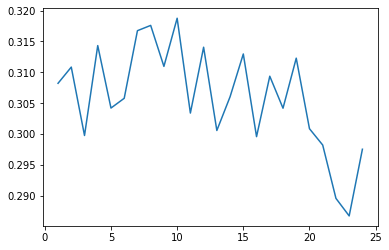

In [88]:
topic_num = range(1,25)
plt.plot(topic_num, cos)
plt.xlabel = '# of Topic'
plt.ylabel = 'Coherence'
plt.show()

In [93]:
model, corpus, coherence, perplexity = topic_model(tokenized_docs=docs_tokenized, num_topics=10, workers=8)

array([0.00666704, 0.00666704, 0.00666704, 0.00666704, 0.00666704,
       0.00666704, 0.00666704, 0.00666704, 0.00666704, 0.00666704,
       0.00666704, 0.00666704, 0.00666704, 0.00666704, 0.00666704,
       0.00666704, 0.00666704, 0.00666704, 0.00666704, 0.00666704,
       0.00666704, 0.00666704, 0.00666704, 0.00666704, 0.00666704,
       0.00666704, 0.00666704, 0.00666704, 0.00666704, 0.00666704,
       0.00666704, 0.00666704, 0.67331487, 0.00666704, 0.00666704,
       0.00666704, 0.00666704, 0.00666704, 0.00666704, 0.00666704,
       0.00666704, 0.00666704, 0.00666704, 0.00666704, 0.00666704,
       0.00666704, 0.00666704, 0.00666704, 0.00666704, 0.00666704],
      dtype=float32)

In [178]:
post_topics = []

for d in data:
    doc = d['title'] + ' ' + d['text']
    normalized_doc = normalize(nlp, doc, remove_stops=True, ngrams=True)

    t_vec = topic_vector(model, normalized_doc)
    try:
        index = np.where(t_vec == max(t_vec))[0][0]
    except:
        index = 0
    topic = model.show_topic(index)
    
    topic_list = [i[0] for i in topic]
    
    post_topic = {'topic_id': index, 'upvote_ratio': d['upvote_ratio'], 'score': d['score'], 'topic': topic_list, 'topic_prob': max(t_vec)}
    
    post_topics.append(post_topic)
    

In [179]:
topic_output_array = []
for i in range(0, len(post_topics)):
    topic = post_topics[i]
    topic_output_array.append([topic['topic_id'], ' '.join(topic['topic']), topic['topic_prob'], topic['score'], topic['upvote_ratio']])

In [180]:
np.savetxt("topics_airbnb.csv", np.asarray(topic_output_array), delimiter=",", fmt='%s')

In [243]:
post_word = [['most_common_word', 'word_count', 'score']]

for d in data:
    doc = d['title'] + ' ' + d['text']
    normalized_doc = normalize(nlp, doc, remove_stops=True, ngrams=True)

    doc_tokenized = normalized_doc.split()
    
    word_freq = Counter(doc_tokenized)
    most_common_word = word_freq.most_common(1)
    
    try:
        post_word.append([most_common_word[0][0], most_common_word[0][1], d['score']])
    except:
        pass


In [244]:
np.savetxt("top_word_vs_score_airbnb.csv", np.asarray(post_word), delimiter=",", fmt='%s')

# Uber

In [188]:
from reddit import load

# add additional subreddits below or comment them out with #
subreddits = """\
https://www.reddit.com/r/uberdrivers/
"""

data = load(subreddits.split())

loaded 1000 reddit submissions


In [189]:
docs = [d['title'] + ' ' + d['text'] for d in data]
normalized_docs = [normalize(nlp, d, remove_stops=True, ngrams=True) for d in docs]
docs_tokenized = [d.split() for d in normalized_docs]

In [190]:
model, corpus, coherence, perplexity = topic_model(tokenized_docs=docs_tokenized, num_topics=10, workers=8)

In [191]:
post_topics = []

for d in data:
    doc = d['title'] + ' ' + d['text']
    normalized_doc = normalize(nlp, doc, remove_stops=True, ngrams=True)

    t_vec = topic_vector(model, normalized_doc)
    try:
        index = np.where(t_vec == max(t_vec))[0][0]
    except:
        index = 0
    topic = model.show_topic(index)
    
    topic_list = [i[0] for i in topic]
    
    post_topic = {'topic_id': index, 'upvote_ratio': d['upvote_ratio'], 'score': d['score'], 'topic': topic_list, 'topic_prob': max(t_vec)}
    
    post_topics.append(post_topic)
    

In [192]:
topic_output_array = []
for i in range(0, len(post_topics)):
    topic = post_topics[i]
    topic_output_array.append([topic['topic_id'], ' '.join(topic['topic']), topic['topic_prob'], topic['score'], topic['upvote_ratio']])

In [193]:
np.savetxt("topics_uber.csv", np.asarray(topic_output_array), delimiter=",", fmt='%s')

In [194]:
flat_doc = [item for sublist in docs_tokenized for item in sublist]

In [195]:
from collections import Counter
word_freq = Counter(flat_doc)
common_words = word_freq.most_common(100)

In [196]:
np.savetxt("common_words_uber.csv", np.asarray(common_words), delimiter=",", fmt='%s')

In [197]:
topic_output_array[0]

[2, 'tell minute pax car start drive ask time wait guy', 0.9133819, 625, 0.99]

In [235]:
post_word = [['most_common_word', 'word_count', 'score']]

for d in data:
    doc = d['title'] + ' ' + d['text']
    normalized_doc = normalize(nlp, doc, remove_stops=True, ngrams=True)

    doc_tokenized = normalized_doc.split()
    
    word_freq = Counter(doc_tokenized)
    most_common_word = word_freq.most_common(1)
    
    try:
        post_word.append([most_common_word[0][0], most_common_word[0][1], d['score']])
    except:
        pass


In [237]:
np.savetxt("top_word_vs_score_uber.csv", np.asarray(post_word), delimiter=",", fmt='%s')